# Type I and Type II errors

## Introduction

In hypothesis testing, you are performing statistical tests to determine whether you believe a statement to be true or false. This initial statement you are testing is called the **null hypothesis**. One common example of this is whether you believe two populations to be statistically different from one another. For example, you might be interested in testing if a new website layout is more effective at getting customers to make a purchase. In order to determine if the new layout was indeed effective, you would compare statistics, such as the average number of purchases in a given day, before and after the change.

There are times, however, when researchers reject the null hypothesis when they should have not rejected it. The opposite might happen as well, where you might fail to reject the null hypothesis when it should have been rejected. Data Scientists refer to these errors as type I and type II errors, respectively. You will soon dive into each one in more detail.


## Objectives

You will be able to:

* Define Type I and Type II errors
* Describe the relationship between alpha and Type I errors
* Differentiate how Type I and Type II errors relate to the p and z-value

## Alpha and Type I Errors

When conducting hypothesis testing, there will almost always be the chance of accidentally rejecting a null hypothesis when it should not have been rejected. Data scientists have the ability to choose a confidence level, alpha ($\alpha$) that they will use as the threshold for accepting or rejecting the null hypothesis. This confidence level is also the probability that you reject the null hypothesis when it is actually true. This scenario is a type I error, more commonly known as a **False Positive**. 

Here is a scenario that will better explain how a type I error might occur:

Say that you flipped a coin 30 times and get a total of 23 heads. The first thought in your head is, is this a fair coin? With that you can create the following null hypothesis:

**Null Hypothesis:** This coin is fair.

**Alternative Hypothesis:** This coin is not fair.

Or expressed mathematically:

$H_{0} : \mu = 0.5 $

$H_{1} : \mu \neq 0.5$

The null hypothesis is assumed to be true unless there is overwhelming evidence to the contrary. To quantify this, you must determine what level of confidence for which you will reject the null hypothesis. If a researcher was to set **alpha ($\alpha$) = .05**, this indicates that there is a 5% chance that you will reject the null hypothesis when it is actually true. Another way to think about this is that if you repeated this experiment 20 times, you would expect to see the hypothesis rejected, purely by chance, one time. The threshold for alpha varies significantly depending on the scientific discipline. Physics, for example, often require that findings are significant to the an alpha level of 0.0000003 or, in other words, one would expect results to occur by chance at most one out of 3.5 million trials! For most other disciplines, an $\alpha$ level of 0.05 is enough to prove some results are statistically significant.


## Beta and Type II Errors
Another type of error is beta ($\beta$), which is the probability that you fail to reject the null hypothesis when it is actually false. Type II errors are also referred to as **False Negatives**. Beta is related to something called _Power_, which is the probability of rejecting the null hypothesis given that it actually is false. Mathematically, _Power_ = 1 - $\beta$. When designing an experiment, scientists will frequently choose a power level they want for an experiment and from that obtain their type II error rate.


## Balancing Type I and Type II Errors Examples   
Different scenarios call for scientists to minimize one type of error over another. The two error types are inversely related to one other; reducing type I errors will increase type II errors and vice versa. Let's go through some different real-life scenarios to determine when it would be better to have a type I or type II error. Imagine you are on a jury and need to decide if someone will be sent to prison for life for a crime. Given that you don't know the truth as to whether or not this individual committed a crime, which would be worse, a type I or a type II error here?

* $H_{0} : defendant = innocent $ 

* $H_{1} : defendant \neq innocent$

Hopefully, you said a type I error would be worse! A type I error would mean that you would send someone to jail when they were truly not guilty! In other words, the jury has rejected the null hypothesis that the defendant is innocent, even though he has not committed any crime. Of course, you would also not want to have a type II error because this would mean that someone actually has committed a crime, and the jury is letting them get away with it.

Let's take a look at an example of a medical scenario. A patient with symptoms of a consistent headache goes to a doctor's office and gets an MRI scan of their head because the doctor suspects the patient might have a brain tumor. Would it be worse to have a type I or type II error in this scenario?

* $H_{0} : patient = healthy $ 

* $H_{1} : patient \neq healthy$


<img src="../../../images/new_doctor.png" width="500">

Hopefully, you said a type II error would be worse! A type II error would mean that the patient actually has a brain tumor, but the doctor claims there is nothing wrong with them. In other words, the null hypothesis is that the person has no brain tumor and this hypothesis fails to be rejected, meaning the person is diagnosed as healthy when in actuality, they are far from it.

When scientists are designing experiments, they need to weigh the risks of type I and type II errors and make decisions about choosing alpha level and power, which you will cover in more detail soon, to optimize for whichever type of error they want to minimize. 

**Null Hypothesis** (**H0**) - The client will not default.  
**Alternative Hypothesis** (**H1**) - The client will default.  

**Type I error** - You reject the null hypothesis when the null hypothesis is actually true.  
**Type II error** - You fail to reject the null hypothesis when the the alternative hypothesis is true.  

**Cost of Type I error** - You erroneously presume that the the client will not default, and a true transaction is rejected.  
**Cost of Type II error** - You erroneously presume that the client will default and the applicants transaction is accepted.  

The following image explains what **Type I error** and **Type II error** are:    

<img src="https://i.stack.imgur.com/x1GQ1.png" width="600"/>

And this alternative image explains even better:  

<img src="https://i2.wp.com/flowingdata.com/wp-content/uploads/2014/05/Type-I-and-II-errors1.jpg" width="600"/>

## Testing an Unfair Coin

In [20]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import math
import random 
import seaborn as sns
sns.set_style('darkgrid')
sns.set(color_codes=True)

Here you'll simulate an unfair coin with 75% chance of heads and 25% chance of tails. You'll then *flip* this coin 20 times and perform a test to determine whether you believe it to be fair or unfair.

In [2]:
n = 20 #Number of flips
p = .75 #Simulating an unfair coin
coin1 = np.random.binomial(n, p)
coin1

12

In this case, you know the theoretical mean and standard deviation of a fair coin; it can be modeled by a binomial distribution with p = 0.5. In future cases, you'll often use a t-test (as you've already previewed) in order to compare samples, but don't know the overall population statistics.

The standard deviation of a binomial distribution is given by:  

$\sigma = \sqrt{n \bullet p \bullet (1-p)}$

So you would expect that for a sample of 20 elements, the standard deviation from the expected number of heads (10) for a fair coin should be:

In [3]:
sigma = np.sqrt(n*.5*(1-.5))
sigma

2.23606797749979

And with that you can now calculate a p-value using a traditional $z$-test:

### $ z = \frac{\bar{x}-\mu}{\sigma/\sqrt{n}}$

Here, $\bar{x}$ is the number of heads, $\mu$ (mu) is the expected number of heads (10), $\sigma$ (sigma) is the standard deviation (calculated above) and n is the number of observations (20).

In [4]:
z = (coin1 - 10) / (sigma / np.sqrt(n))  # sigma is Std and np.sqrt(n) is our variance
z

4.0

In [5]:
z = (coin1 - 10) / (sigma / np.sqrt(n))
z

4.0

Finally, you can take your $z$-score and apply standard lookup tables based on your knowledge of the normal distribution to determine the probability 

In [6]:
import scipy.stats as st

In [7]:
st.norm.sf(np.abs(z))

3.167124183311986e-05

This is an absolutely tiny p-value, meaning that you can reject the null hypothesis *this coin is fair* and conclude that the coin is unfair!

Here is a demonstration of how the average p-values change as the size of the sample increases.

Text(0.5, 0, 'Number of Coin Flips')

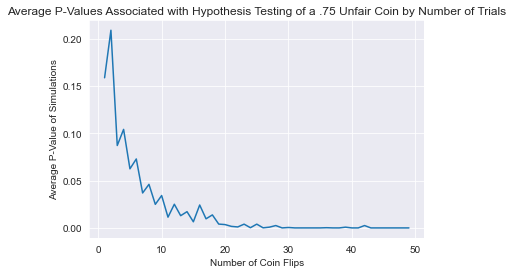

In [9]:
#How many times would you have to flip a 75% heads coin to determine it was false?
p_vals = []
#Iterate through various numbers of trials
for n in range(1,50):
    #Do multiple runs for that number of samples to compare
    p_val = []
    for i in range(200):
        p = .75 # Simulating an unfair coin
        n_heads = np.random.binomial(n, p)
        mu = n / 2
        sigma = np.sqrt(n*.5*(1-.5))
        z  = (n_heads - mu) / (sigma / np.sqrt(n))
        p_val.append(st.norm.sf(np.abs(z)))
    p_vals.append(np.mean(p_val))
plt.plot(list(range(1,50)), p_vals)
plt.title('Average P-Values Associated with Hypothesis Testing of a .75 Unfair Coin by Number of Trials')
plt.ylabel('Average P-Value of Simulations')
plt.xlabel('Number of Coin Flips')

# Type I and Type II Errors - Exercise

## Introduction

In this lab, you'll run some of your own simulations to learn more about type I and type II errors. Remember that, the result of a statistical hypothesis test and the corresponding decision of whether to reject or accept the null hypothesis, is not infallible. A test provides evidence for or against the null hypothesis and then you decide whether to accept or reject it based on that evidence, but the evidence may lack the strength to arrive at the correct conclusion. Incorrect conclusions made from hypothesis tests fall in one of two categories, i.e. [Type I and Type II errors](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors). By running some of these simulations, you should have a better idea of why a 95% confidence level is often used for hypothesis testing.


## Objectives

You will be able to:

* Differentiate how Type I and Type II errors relate to the p and z-value
* Describe the relationship between alpha and Type I errors
* Create simulations and visualizations to represent scenarios involving Type I and Type II errors

## Alpha and Beta

**Alpha ($\alpha$):** is the probability of a Type I error i.e. finding a difference when a difference does not exist. 

Most medical literature uses an alpha cut-off of 5% (0.05), indicating a 5% chance that a significant difference is actually due to chance and is not a true difference. 

**Beta ($\beta$):** is the probability of a Type II error i.e. not detecting a difference when one actually exists. 

Beta is directly related to study power (Power = $1 - \beta$) which you will investigate further in the next lesson. Most medical literature uses a beta cut-off of 20% (0.2), indicating a 20% chance that a significant difference is missed. 



Now you will attempt to create a simulation to visualize this phenomenon using Python.

#####  First, create a population of 1000 elements with a mean of 100 and a standard deviation of 20.

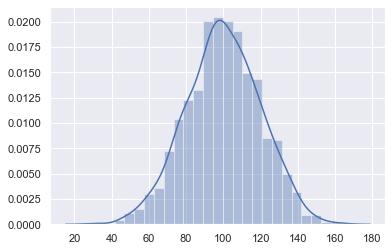

In [12]:
# Create a population with mean=100 and sd=20 and size = 1000
pop = np.random.normal(100, 20, 1000)
pop.dtype
sns.distplot(pop);

&#9989; Now take two samples from this population and comment on the difference between their means and standard deviations. How would you ensure the independence between the elements of these samples? 

In [13]:
k = 100
sample1 = np.random.choice(pop,100,replace=True)

print ("Sample 1 Summary")
stats.describe(sample1)

Sample 1 Summary


DescribeResult(nobs=100, minmax=(51.415564973991145, 147.9204846561242), mean=97.07713072948184, variance=303.88659476130084, skewness=0.14194545710367568, kurtosis=0.16030656601723692)

### Sample 2

In [14]:
sample2 = np.random.choice(pop,100,replace=True)
print ("Sample 2 Summary")
stats.describe(sample2)

Sample 2 Summary


DescribeResult(nobs=100, minmax=(45.379723751881585, 149.8044026417086), mean=101.30849845634293, variance=443.4129095700857, skewness=-0.0020495312413029592, kurtosis=0.08133561926068422)

&#9989; You can see that if you took two samples from this population, the difference between the mean of samples 1 and 2 is very small (this can be tried repeatedly). You must sample with replacement in order to ensure the independence assumption between elements of the sample. 

&#9989; There is, however, still a probability of seeing a very large difference between values, even though they're estimates of the same population parameters. In a statistical setting, you'd interpret these unusually large differences as evidence that the two samples are statistically different. It depends on how you define statistical significance. In statistical tests, this is done by setting a significance threshold $\alpha$  (alpha). Alpha controls how often we'll get a type I error. A type I error occurs when the statistical test erroneously indicates a significant result.

&#9989; You can run a two-sample t-test with the independence assumption on these samples and, as expected, the null hypothesis will fail to be rejected due to similarities between distributions. You can also visualize the distribution to confirm the similarity between means and Stds. 

In [15]:
# test the sample means
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=-1.5478662190712031, pvalue=0.12325135910967397)

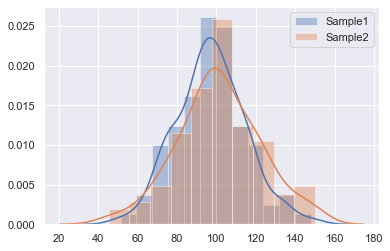

In [16]:
plt.figure("Test Samples")
sns.distplot(sample1, label='Sample1') 
sns.distplot(sample2, label='Sample2')
plt.legend()
plt.show()

## Simulating Type I and II errors

### Type I error
Remember that when a hypothesis test is being performed, scientists are trying to determine if two samples are from the same population or not. When a hypothesis is rejected, they are concluding that a sample must have come from a different population. Type I error describes a situation where you reject the null hypothesis when it is actually true. It assumes two samples come from a _different_ population when, in reality, they are from the _same_ population. This type of error is also known as a "false positive" or "false hit". The type I error rate is equal to the significance level $\alpha$, so setting a higher confidence level (and therefore lower $\alpha$) reduces the chances of getting a false positive. 



### How alpha affects the prevalence of Type I errors.

Next, we shall see how alpha affects the rate of type I errors. 

**Exercise:** Write a function `type_1_error` in Python to encapsulate the code shown above in order to repeat hypothesis tests on two randomly drawn distributions. The t-test will mostly fail to reject the null hypothesis, except, when by random chance you get a set of **extremely** different samples thus reject the null hypothesis (type I error). The frequency of such bad results depends upon the value of alpha. 

`type_1_error` should take in the parameters:

* `population`: (NumPy array) a random normal distribution
* `num_tests`: (int) specifies the number of hypothesis tests to compute
* `alphas`: (list) a list of the alpha levels at which you are testing

`type_1_error` should return:

* `sig_tests`: (DataFrame) a dataframe that has the columns 'type_1_error', 'p_value', 'alpha'

Within `type_1_error`, you should:

1. Repeatedly take two random samples from `population` and run independent t-tests.    
2. Store the p-value, alpha, and a boolean variable to show whether the null hypothesis **was rejected** or not (i.e. if p-value is less than alpha), for each test

To test your function:

1. Create a population distribution with a mean of 100, a standard deviation of 20, and a size of 1000 
2. Specify the number of hypothesis tests to be 1000
3. Create a list of alphas =  [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]


In [17]:
def type_1_error(population, num_tests, alpha_set):
    """
    Parameters
    ----------
    population: ndarray
        A random normal distribution
    num_tests: int
        The number of hypothesis tests to be computed
    alpha_set: list
        List of alpha levels
    
    Returns
    ----------
    sig_tests : DataFrame
        A dataframe containing the columns 'type_1_error', 'p_value', and 'alpha'
    """
    columns = ['type_1_error','p_value','alpha']
    sig_tests = pd.DataFrame(columns=columns)
    counter = 0
    
    for i in range(1,num_tests+1):
        
        for alpha in alpha_set:
            
            # take two samples from the same population
            samp1 = np.random.choice(population,100,replace=True)
            samp2 = np.random.choice(population,100,replace=True)
            
            # test sample means
            result = stats.ttest_ind(samp1, samp2)
            
            # evaluate whether null hypothesis is rejected or not
            if result[1] < alpha:
                 sig_tests.loc[counter] = [1, result[1], alpha]
            else:
                 sig_tests.loc[counter] = [0, result[1], alpha]

            counter += 1
            
    return sig_tests

&#9989; Now we have to summarize the results, this is done using the pandas `groupby()` method which sums the `type_1_error` column for each level of alpha. The `groupby()` method iterates over each value of alpha, selecting the type I error column for all rows with a specific level of alpha, and then applies the sum function to the selection. 

&#9989; What's the relationship between alpha and type I errors?

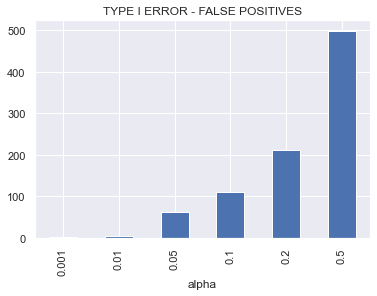

In [22]:
# group type I error by values of alpha
pop = np.random.normal(100, 20, 1000)
num_tests = 1000
alpha_set = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]
sig_tests_1 = type_1_error(pop, num_tests, alpha_set)
group_error = sig_tests_1.groupby('alpha')['type_1_error'].sum()
group_error.plot.bar(title = "TYPE I ERROR - FALSE POSITIVES");

+ The grouped data clearly shows that as value of alpha is increases from .001 to .5, the probability of type I errors also increases. 

# Type II error 

This error describes a situation where you fail to reject the null hypothesis when it is actually false. Type II error is also known as a "false negative" or "miss". The higher your confidence level, the more likely you are to make a type II error.

## How alpha affects the prevalence of Type II errors.

**Exercise:** Write a function called `type_2_error` similar to the above except samples should be taken from two different populations.  The hypothesis test should, in most cases, reject the null hypothesis as the samples belong to different populations, except, in extreme cases where there is no significant difference between samples i.e. a type II error (False Negatives). Your function should demonstrate how the rate of false negatives is affected by alpha. 

`type_2_error` should take in the parameters:

* `population`: (NumPy array) a random normal distribution
* `population_2`: (NumPy array) a random normal distribution with a different mean than the population
* `num_tests`: (int) specifies the number of hypothesis tests to compute
* `alphas`: (list) a list of the alpha levels at which you are testing

`type_2_error` should return:

* `sig_tests`: (DataFrame) a dataframe that has the columns 'type_2_error', 'p_value', 'alpha'

Within `type_2_error`, you should:

1. Repeatedly take two random samples from population and run independent t-tests.    
2. Store p_value, alpha, and a boolean variable to show whether the null hypothesis **failed to be rejected** or not (i.e. if p-value is less than alpha), for each test

&#9989; To test your function:

1. Create a population distribution with a mean of 100, a standard deviation of 20, and a size of 1000 
2. Create a second population distribution with a mean of 110, a standard deviation of 20, and a size of 1000
3. Specify the number of hypothesis tests to be 1000
4. Create a list of alphas =  [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]

In [23]:
def type_2_error(population, population_2, num_tests, alpha_set):
    
    """
    Parameters
    ----------
    population: ndarray
        A random normal distribution
    population_2: ndarray
        A different random normal distribution
    num_tests: int
        The number of hypothesis tests to be computed
    alpha_set: list
        List of alpha levels
    
    Returns
    ----------
    sig_tests : DataFrame
        A dataframe containing the columns 'type_2_error', 'p_value', and 'alpha'
    """
    
    columns = ['type_2_error','p_val','alpha']
    sig_tests = pd.DataFrame(columns=columns)
    counter = 0
    
    for i in range(1,num_tests+1):
        
        for alpha in alpha_set:
            
            # take two samples from the same population
            samp1 = np.random.choice(population,100,replace=True)
            samp2 = np.random.choice(population_2,100,replace=True)
            
            # test sample means
            result = stats.ttest_ind(samp1, samp2)
            
            # evaluate whether null hypothesis is rejected or not
            if result[1] > alpha:
                 sig_tests.loc[counter] = [1, result[1], alpha]
            else:
                 sig_tests.loc[counter] = [0, result[1], alpha]

            counter += 1
            
    return sig_tests

&#9989; Now, create a visualization that will represent each one of these decisions. What's the relationship between alpha and type II errors?

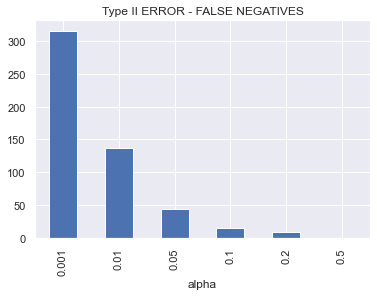

In [24]:
pop = np.random.normal(100, 20, 1000)
pop2 = np.random.normal(110, 20, 1000)
num_tests = 1000
alpha_set = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]
sig_tests_2 = type_2_error(pop,pop2,num_tests,alpha_set)

group_error2 = sig_tests_2.groupby('alpha')['type_2_error'].sum()
group_error2.plot.bar(title = "Type II ERROR - FALSE NEGATIVES");

+ The grouped data clearly shows that as value of alpha is increased from .001 to .5, the probability of type II errors decreases. 


### Why is an α level of 0.05 chosen as a cut-off for statistical significance?

The $\alpha$ level of 0.05 is considered s good balance to avoid excessive type I or type II errors. 


If you decide to use a large value for alpha : 

* Increases the chance of rejecting the null hypothesis
* The risk of a type II error (false negative) is REDUCED
* Risk of a type I error (false positive) is INCREASED

Similarly, if you decide to use a very small value of alpha, it'll change the outcome as:
* Increases the chance of accepting the null hypothesis
* The risk of a Type I error (false positive) is REDUCED
* Risk of a Type II error (false negative) is INCREASED

From above, you can see that in statistical hypothesis testing, the more you try and avoid a type I error (false positive), the more likely a type II error (false negative) will occur. 



## Summary

&#9989; You now know what type I and type II errors are. Let's go and practice your knowledge!

&#9989; The key statistical point here is that there is always a trade off between false positives and false negatives. By increasing alpha, the number of false positives increases, but the number of false negatives decreases as shown in the bar graphs. The value of $\alpha$ = 0.05 is considered a reasonable compromise between these two types of errors. Within the concept of "significance," there is embedded a trade-off between these two types of errors. 

&#9989; Think of "significance" as a compromise between false positives and negatives, not as absolute determination.